In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#Didn't import the SKL yet

In [194]:
wine = pd.read_csv(r"C:\Users\97258\OneDrive - Ariel University\avoav\הדמיית נתונים סמסטר ב\wineQT.csv")

In [207]:

#wine.drop(columns='index', inplace=True)

In [205]:
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [208]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [265]:
wine = wine.dropna()

In [266]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Explore the diffrence between values for each col

In [267]:
#a great way to see the radical values for each col.
COMPAR_NUM = 30

coloredData = sns.light_palette("brown", as_cmap=True)
wine.head(COMPAR_NUM).style.background_gradient(cmap=coloredData)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.000000,0.270000,0.360000,20.700000,0.045000,45.000000,170.000000,1.001000,3.000000,0.450000,8.800000,6
1,6.300000,0.300000,0.340000,1.600000,0.049000,14.000000,132.000000,0.994000,3.300000,0.490000,9.500000,6
2,8.100000,0.280000,0.400000,6.900000,0.050000,30.000000,97.000000,0.995100,3.260000,0.440000,10.100000,6
3,7.200000,0.230000,0.320000,8.500000,0.058000,47.000000,186.000000,0.995600,3.190000,0.400000,9.900000,6
4,7.200000,0.230000,0.320000,8.500000,0.058000,47.000000,186.000000,0.995600,3.190000,0.400000,9.900000,6
5,8.100000,0.280000,0.400000,6.900000,0.050000,30.000000,97.000000,0.995100,3.260000,0.440000,10.100000,6
6,6.200000,0.320000,0.160000,7.000000,0.045000,30.000000,136.000000,0.994900,3.180000,0.470000,9.600000,6
7,7.000000,0.270000,0.360000,20.700000,0.045000,45.000000,170.000000,1.001000,3.000000,0.450000,8.800000,6
8,6.300000,0.300000,0.340000,1.600000,0.049000,14.000000,132.000000,0.994000,3.300000,0.490000,9.500000,6
9,8.100000,0.220000,0.430000,1.500000,0.044000,28.000000,129.000000,0.993800,3.220000,0.450000,11.000000,6


In [269]:
#wine.drop(columns='type', inplace=True)

In [270]:
#an automatic way to get a color map for each quality.
#unfor that method doesn't work in jupyter.

def perQua(x):
    wine[wine.quality == x].head().style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

minQuality = wine.quality.min()
maxQuality = wine.quality.max()

for x in np.arange(minQuality, maxQuality+1):
    perQua(x)

# Correlation heat-table

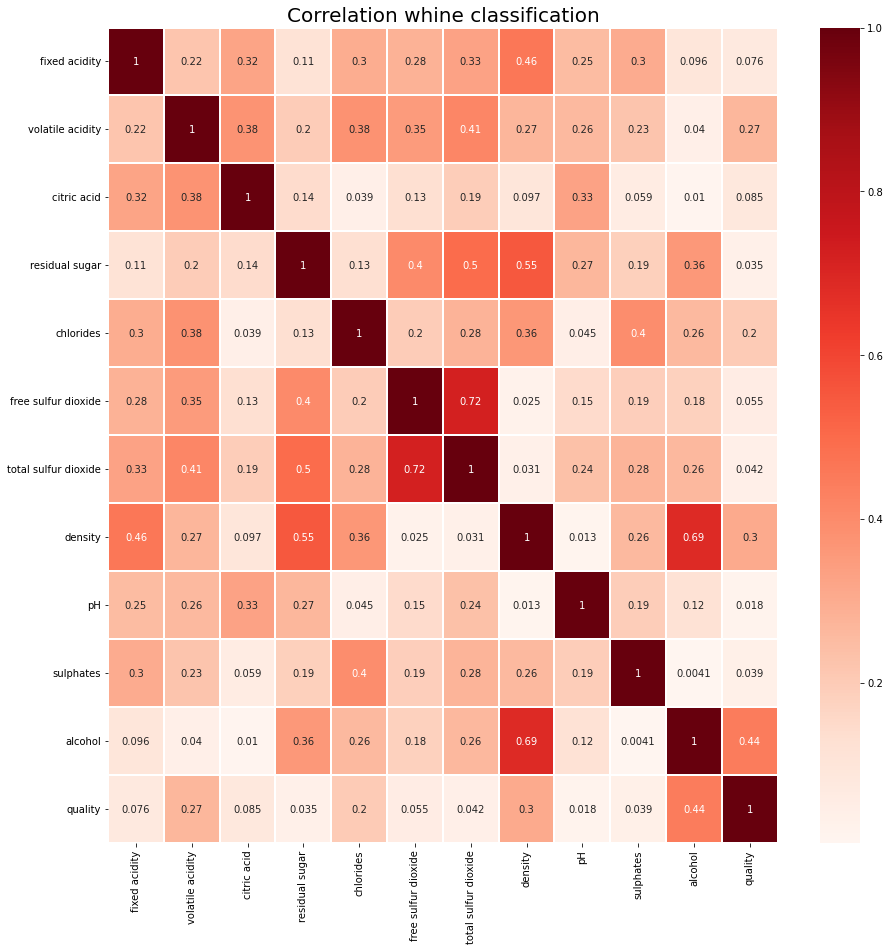

In [308]:
def get_headmap(wine: dict):
    corr = wine.corr().abs()
    plt.figure(figsize=(15, 15))
    sns.heatmap(corr, annot=True, cmap="Reds", linewidths=0.1, annot_kws={"fontsize":10})
    plt.title("Correlation whine classification", size=20)
get_headmap(wine)

In [311]:
 wine.corr().abs()['quality']

fixed acidity           0.076174
volatile acidity        0.266677
citric acid             0.084926
residual sugar          0.034654
chlorides               0.200553
free sulfur dioxide     0.054924
total sulfur dioxide    0.041598
density                 0.304447
pH                      0.018403
sulphates               0.039054
alcohol                 0.444637
quality                 1.000000
Name: quality, dtype: float64

# Counting amount per quality

In [272]:
#method to calculate how much wines are in any quality

winePerQua = {}
for value in wine.quality:
    if value not in winePerQua:
        winePerQua[value] = 0
    winePerQua[value] += 1
winePerQua

{6: 2820, 5: 2128, 7: 1074, 8: 192, 4: 214, 3: 30, 9: 5}

In [273]:
#spliting winePerQua to 2 lists - one for values, one for qualities.
values = [vl for vl in winePerQua.values()]
names = [nm for nm in winePerQua]


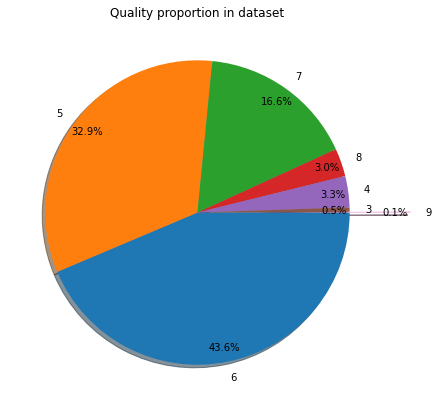

In [274]:
plt.figure(figsize=(7, 7))
plt.pie([values][0], radius = 1, shadow=True,
        labels=[names][0], counterclock=False, autopct='%1.1f%%', pctdistance=0.9, explode=[0,0,0,0,0,0,0.4])
#plt.pie([wine.shape[0]], labeldistance=-0, radius=0.5, colors=['powderblue'])
plt.title("Quality proportion in dataset")
plt.show()

# עד כאן משנה שעברה - וכעת
## Spliting Scaling and modeling with kmeans

In [278]:
from sklearn.preprocessing import MinMaxScaler

In [450]:

from sklearn.model_selection import train_test_split

In [276]:
Y = wine['quality']
X = wine[wine.columns[0: len(wine.columns)-1]]

In [277]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=20)
print(f'Training {x_train.shape}')
print(f'Test {x_test.shape}')

Training (5170, 11)
Test (1293, 11)


In [279]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

print('Train dataset after scaler:')
pd.DataFrame(x_train).head(10).style.background_gradient(cmap=sns.light_palette("brown", as_cmap=True))

Train dataset after scaler:


,0,1,2,3,4,5,6,7,8,9,10
0,0.350877,0.093333,0.295181,0.290323,0.046512,0.180556,0.341014,0.343979,0.232558,0.045714,0.433333
1,0.403509,0.293333,0.204819,0.067742,0.129568,0.079861,0.267281,0.477773,0.418605,0.205714,0.250000
2,0.219298,0.113333,0.216867,0.258065,0.046512,0.215278,0.460829,0.362538,0.356589,0.142857,0.266667
3,0.219298,0.133333,0.186747,0.219355,0.053156,0.020833,0.172811,0.233492,0.248062,0.125714,0.566667
4,0.078947,0.226667,0.000000,0.038710,0.058140,0.059028,0.188940,0.191627,0.744186,0.274286,0.933333
5,0.236842,0.140000,0.150602,0.374194,0.051495,0.097222,0.299539,0.362106,0.255814,0.228571,0.400000
6,0.271930,0.146667,0.445783,0.416129,0.049834,0.156250,0.366359,0.477773,0.232558,0.085714,0.116667
7,0.236842,0.233333,0.168675,0.283871,0.078073,0.097222,0.407834,0.380233,0.348837,0.102857,0.233333
8,0.175439,0.140000,0.192771,0.096774,0.028239,0.131944,0.304147,0.089340,0.457364,0.068571,0.850000
9,0.271930,0.106667,0.234940,0.096774,0.024917,0.118056,0.253456,0.244713,0.348837,0.148571,0.483333


## Dummy model

In [280]:
optQua = len(wine.quality.unique())
dummyModelScore = 1 / optQua
print(f'Score: {dummyModelScore}')

Score: 0.14285714285714285


## kmeans model with visualization

In [ ]:
# In the following algorithm we will use what we learned in class about unsupervized learning
#, and we going to try to find the "quality" clusters just with two columns without use the quality column

In [ ]:
#first , we need to choose our "x" axis - we cose the alcohol amount Because of the high correlation it has with the quality
#second we choose the "volatile acidity" (חומציות) for the y axis

In [378]:
Y = wine['density'].drop(index=wine[wine['density']>1.01].index)
X = wine['alcohol'].drop(index=wine[wine['density']>1.01].index)

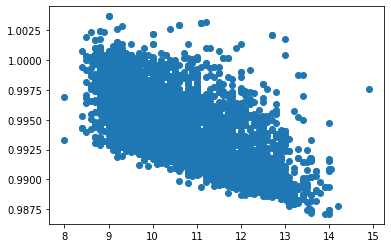

In [362]:
plt.scatter(X ,Y)
#קשה לראות בעין את החלוקה כי יש המון נקודות
#אבל אפשר להבין שיש יין עם צפיפות גבוהה ומעט אלכוהול לעומת יינות עם הרבה אלכוהול וצפייות נמוכה.

In [382]:
X = np.array(X).reshape(6460, 1)
Y = np.array(Y).reshape(6460, 1)

In [383]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
Y= scaler.fit_transform(Y)

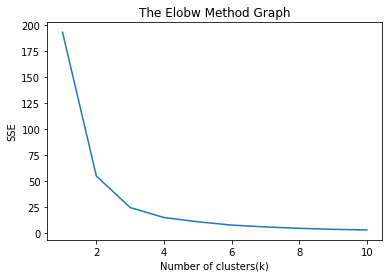

In [384]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
SSE= []  #Initializing the list for the values of  SSE == sum squered errors  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(X)  
    SSE.append(kmeans.inertia_)  
plt.plot(range(1, 11), SSE)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('SSE')  
plt.show()  

In [385]:
#From the above plot, we can see the elbow point is at 4. So the number of clusters here will be 5.

SSE #== Within-Cluster Sum of Squares סבום הריבועים של המרחק מהקו הליניארי

[193.06496675238398,
 54.61670186106629,
 24.29362792819744,
 14.62524318296082,
 10.56285804164306,
 7.386634124501734,
 5.632737618367082,
 4.263725296289709,
 3.3133083537373595,
 2.7288466933630833]

In [402]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=4, random_state= 42)  
y_predict= kmeans.fit_predict(wine[['alcohol' , 'density']])  

In [403]:
wine = wine.drop(index=wine[wine['density']>1.01].index)
wine['cluster'] = y_predict
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,3
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,3
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,3
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,2
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,3


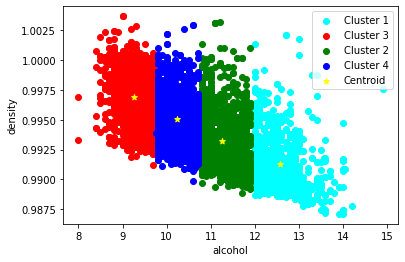

In [408]:
#visulaizing of the clusters   

df1 = wine[wine.cluster == 0]
df2 = wine[wine.cluster == 1]
df3 = wine[wine.cluster == 2]
df4 = wine[wine.cluster == 3]

plt.scatter(df1.alcohol , df1['density'] , c = 'cyan' , label = 'Cluster 1')
plt.scatter(df2.alcohol , df2['density'] , c = 'red', label = 'Cluster 3')
plt.scatter(df3.alcohol , df3['density'] , c = 'green' ,label = 'Cluster 2')
plt.scatter(df4.alcohol , df4['density'] , c = 'blue' ,label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],  c = 'yellow', marker = "*", label = 'Centroid')  

plt.xlabel('alcohol')
plt.ylabel('density')
plt.legend()

In [405]:
kmeans.cluster_centers_

array([[12.56076424,  0.99125611],
       [ 9.27028004,  0.99688955],
       [11.25574379,  0.99321334],
       [10.22522831,  0.99508915]])

In [410]:
# now lets check if we need to ind other K:

k_rng = range( 1 ,11 )

SSE = []

for k in k_rng:
    km = KMeans ( n_clusters = k)
    km.fit(wine[['alcohol' , 'density']])
    SSE.append(km.inertia_) # return the sum squered error...

In [411]:
SSE

[9191.878832388917,
 2600.336569064445,
 1156.651959346978,
 698.3181305805604,
 497.72886270638384,
 352.1730034224889,
 262.73417090565755,
 201.25426945704965,
 159.6458711028413,
 130.93691657457194]

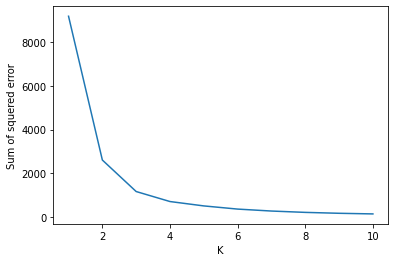

In [412]:
plt.xlabel('K')
plt.ylabel ('Sum of squered error')
plt.plot(k_rng , SSE)

In [413]:
# and we see that our "elbow" point - in 4 what means 4 clusters...

In [417]:
winePerQua = {}
for value in wine.quality:
    if value not in winePerQua:
        winePerQua[value] = 0
    winePerQua[value] += 1
winePerQua

{6: 2817, 5: 2128, 7: 1074, 8: 192, 4: 214, 3: 30, 9: 5}

In [418]:
winePerQua = {}
for value in wine.cluster:
    if value not in winePerQua:
        winePerQua[value] = 0
    winePerQua[value] += 1
winePerQua

{1: 2214, 3: 1752, 2: 1517, 0: 977}

In [419]:
#lets try to see if the "6" quality are clusters to one clusters in our division

In [445]:
qu_6 = wine[wine['quality'] == 6].reset_index(drop=True)
clusters_6 = []
for i in range(len(qu_6)):
    cluster_6.append(qu_6.cluster[i])
        

In [447]:
len(clusters_6)

2817

In [449]:
classVSqua = {}
for val in qu_6.cluster :
    if val not in classVSqua:
        classVSqua[val] = 0
    classVSqua[val] += 1
classVSqua

{1: 774, 3: 857, 2: 765, 0: 421}